In [2]:
import pandas as pd
import tensorflow.compat.v1 as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
"""
TwitterSEISMIC Dataset
  <relative_time_second>: relative post time of the tweet/retweet (in second)
  <number_of_followers>: number of followers of the user who tweets/retweets
"""
data = pd.read_csv("data.csv")
data

,relative_time_second,number_of_followers
0,0.0,33.0
1,84833.0,46828.0
2,84878.0,208.0
3,84883.0,37.0
4,84900.0,137.0
...,...,...
34784483,103297.0,110.0
34784484,108205.0,24.0
34784485,109345.0,151.0
34784486,158677.0,391.0


In [3]:
"""
TwitterSEISMIC Index
  <tweet_id>: id of the original tweet
  <post_time_day>: post time (UTC) of the original tweet (in day)
  <start_ind>: the first row in data.csv of this tweet
  <end_ind>: the last row in data.csv of this tweet 
"""
from datetime import datetime
index = pd.read_csv("index.csv")
index['post_date'] = pd.to_datetime(index['post_time_day'], unit='D', origin=pd.Timestamp('2011-10-07'))
index['total_retweets_over_15_days'] = index["end_ind"] - index["start_ind"]
index.shape

(166076, 6)

In [4]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166076 entries, 0 to 166075
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   tweet_id                     166076 non-null  float64       
 1   post_time_day                166076 non-null  float64       
 2   start_ind                    166076 non-null  int64         
 3   end_ind                      166076 non-null  int64         
 4   post_date                    166076 non-null  datetime64[ns]
 5   total_retweets_over_15_days  166076 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 7.6 MB


In [7]:
index

,tweet_id,post_time_day,start_ind,end_ind,post_date,total_retweets_over_15_days
0,1.224346e+17,0.926644,1,175,2011-10-07 22:14:22.000041600,174
1,1.224497e+17,0.968160,176,369,2011-10-07 23:14:08.999980800,193
2,1.224502e+17,0.969560,370,703,2011-10-07 23:16:09.999984000,333
3,1.224430e+17,0.949734,704,827,2011-10-07 22:47:36.999974400,123
4,1.224566e+17,0.987373,828,941,2011-10-07 23:41:48.999984000,113
...,...,...,...,...,...,...
166071,1.250005e+17,8.007164,34784039,34784103,2011-10-15 00:10:19.000012800,64
166072,1.250006e+17,8.007407,34784104,34784155,2011-10-15 00:10:39.999964800,51
166073,1.259254e+17,10.559387,34784156,34784320,2011-10-17 13:25:30.999993600,164
166074,1.255487e+17,9.519977,34784321,34784412,2011-10-16 12:28:46.000012800,91


In [14]:
#index.groupby(['tweet_id']).count()['post_date'].sort_values(ascending=False)

tweet_id
1.228363e+17    2
1.272263e+17    2
1.273977e+17    2
1.241687e+17    2
1.275346e+17    1
               ..
1.258890e+17    1
1.258890e+17    1
1.258890e+17    1
1.258890e+17    1
1.222055e+17    1
Name: post_date, Length: 166072, dtype: int64

In [15]:
data.describe()

,relative_time_second,number_of_followers
count,3.478449e+07,3.478449e+07
mean,3.915859e+04,2.774206e+03
std,8.903090e+04,6.488015e+04
min,0.000000e+00,0.000000e+00
25%,3.340000e+02,5.000000e+01
50%,3.209000e+03,1.200000e+02
75%,2.931200e+04,2.860000e+02
max,6.047990e+05,1.475595e+07


In [7]:
"""
Identify cascades in the network
    2% tweets were selected as outbreak tweets according to their final retweets and the minimum retweet
    number of outbreak tweets was selected as the outbreak threshold
    3131 outbreak tweets with the outbreak threshold was 1000 
"""
index['outbreak'] = index['total_retweets_over_15_days'] > 1000
total_tweets_s =  index # index.sort_values(by='total_retweets_over_15_days', ascending = False)
total_tweets_s.groupby('outbreak').count()

,tweet_id,post_time_day,start_ind,end_ind,post_date,total_retweets_over_15_days
outbreak,,,,,,
False,162945,162945,162945,162945,162945,162945
True,3131,3131,3131,3131,3131,3131


In [18]:
total_tweets_s[total_tweets_s['outbreak'] == True]

,tweet_id,post_time_day,start_ind,end_ind,post_date,total_retweets_over_15_days,outbreak
6,1.223634e+17,0.730093,1030,2418,2011-10-07 17:31:20.000035200,1388,True
125,1.223817e+17,0.780741,18737,20221,2011-10-07 18:44:16.000022400,1484,True
399,1.223742e+17,0.759838,51163,52347,2011-10-07 18:14:10.000003199,1184,True
492,1.224512e+17,0.972269,63066,64598,2011-10-07 23:20:04.000041600,1532,True
512,1.222801e+17,0.500382,66280,71243,2011-10-07 12:00:32.999961600,4963,True
...,...,...,...,...,...,...,...
165751,1.267494e+17,12.833194,34735204,34736441,2011-10-19 19:59:47.999961600,1237,True
165840,1.261191e+17,11.093819,34748109,34749226,2011-10-18 02:15:05.999961600,1117,True
165964,1.258107e+17,10.242836,34762775,34770154,2011-10-17 05:49:40.999987200,7379,True
166027,1.263387e+17,11.699954,34776195,34777216,2011-10-18 16:47:56.000025600,1021,True


In [19]:
import matplotlib.pyplot as plt
index.plot(x ='post_date', y='total_retweets_over_15_days', kind='bar')
plt.show()

<Figure size 640x480 with 1 Axes>

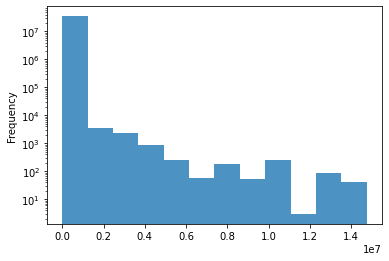

In [20]:
# y-axis is a count of things and the x-axis shows the things being counted
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax = data['number_of_followers'].plot.hist(bins=12, alpha=0.8, log=True)

In [28]:
total_tweets_s.describe()

,tweet_id,post_time_day,start_ind,end_ind,total_retweets_over_15_days
count,1.660760e+05,166076.000000,1.660760e+05,1.660760e+05,166076.000000
mean,1.250288e+17,8.085091,1.745785e+07,1.745805e+07,208.449216
std,1.492915e+15,4.119661,1.011126e+07,1.011126e+07,396.576751
min,1.222055e+17,0.294514,1.000000e+00,1.750000e+02,49.000000
25%,1.237589e+17,4.580842,8.740974e+06,8.741077e+06,70.000000
50%,1.250004e+17,8.006973,1.728315e+07,1.728324e+07,110.000000
75%,1.263741e+17,11.797674,2.614600e+07,2.614647e+07,219.000000
max,1.275346e+17,14.999873,3.478441e+07,3.478449e+07,33484.000000


In [21]:
total_tweets_dates =  index
total_tweets_dates.groupby('post_time_day').count()

,tweet_id,start_ind,end_ind,post_date,total_retweets_over_15_days,outbreak
post_time_day,,,,,,
0.294514,1,1,1,1,1,1
0.295231,1,1,1,1,1,1
0.297766,1,1,1,1,1,1
0.298090,1,1,1,1,1,1
0.300127,1,1,1,1,1,1
...,...,...,...,...,...,...
14.999780,1,1,1,1,1,1
14.999792,1,1,1,1,1,1
14.999803,1,1,1,1,1,1


In [29]:
def merge_data(index, data):
    idx = index[['tweet_id','total_retweets_over_15_days','post_date','post_date','outbreak','start_ind', 'end_ind']].to_dict('records')
    empty = pd.DataFrame()
    df_list = []
    for i, d in enumerate(idx):
        df_list += [d for i in range(d['total_retweets_over_15_days']+1)]
    tweet_list = pd.DataFrame(df_list)
    
    # Now Merge
    index_merged = tweet_list.join(data)

    # Convert to int for easier reading
    index_merged['tweet_id'] = index_merged['tweet_id'] #.astype('int64')

    return index_merged

index_merged = merge_data(index, data)
index_merged

C:\Anaconda38\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  


,tweet_id,total_retweets_over_15_days,post_date,outbreak,start_ind,end_ind,relative_time_second,number_of_followers
0,1.224346e+17,174,2011-10-07 22:14:22.000041600,False,1,175,0.0,33.0
1,1.224346e+17,174,2011-10-07 22:14:22.000041600,False,1,175,84833.0,46828.0
2,1.224346e+17,174,2011-10-07 22:14:22.000041600,False,1,175,84878.0,208.0
3,1.224346e+17,174,2011-10-07 22:14:22.000041600,False,1,175,84883.0,37.0
4,1.224346e+17,174,2011-10-07 22:14:22.000041600,False,1,175,84900.0,137.0
...,...,...,...,...,...,...,...,...
34784483,1.254171e+17,75,2011-10-16 03:45:46.999958400,False,34784413,34784488,103297.0,110.0
34784484,1.254171e+17,75,2011-10-16 03:45:46.999958400,False,34784413,34784488,108205.0,24.0
34784485,1.254171e+17,75,2011-10-16 03:45:46.999958400,False,34784413,34784488,109345.0,151.0
34784486,1.254171e+17,75,2011-10-16 03:45:46.999958400,False,34784413,34784488,158677.0,391.0


In [30]:
index_merged.to_csv("merged_data.csv")

In [32]:
index_merged.groupby('post_date').count()

,tweet_id,total_retweets_over_15_days,outbreak,start_ind,end_ind,relative_time_second,number_of_followers
post_date,,,,,,,
2011-10-07 07:04:06.000009599,177,177,177,177,177,177,177
2011-10-07 07:05:07.999958400,75,75,75,75,75,75,75
2011-10-07 07:08:47.000025600,264,264,264,264,264,264,264
2011-10-07 07:09:15.000019200,282,282,282,282,282,282,282
2011-10-07 07:12:11.000016000,379,379,379,379,379,379,379
...,...,...,...,...,...,...,...
2011-10-21 23:59:41.000035200,148,148,148,148,148,148,148
2011-10-21 23:59:42.000028800,710,710,710,710,710,710,710
2011-10-21 23:59:43.000022400,72,72,72,72,72,72,72


In [ ]:
# total_tweets_grouped =  index_merged
# total_tweets_grouped.groupby('outbreak').count()

In [36]:
"""
 Break into time windows
"""

def gen_groups(data, window_length_hrs = 1, window_size_secs = 10):
    gb = data.groupby('tweet_id')
    digest = pd.DataFrame()
    for name, group in gb:
        group = group[group['relative_time_second'] < 3600 * window_length_hrs]
        group['window'] = group['relative_time_second'].apply(lambda x: x//window_size_secs)
        
        for n, sg in group.groupby('window'):
            nf = sg['number_of_followers']
            tweet_window = {'tweet_id':name, 'median_followers' : nf.median(), 
                            'count_retweets': nf.count(), 'sum_followers': nf.sum(), 
                            'outbreak': sg['outbreak'].max(),
                            'window': n,
                            'post_date': sg['post_date'].max()}
            yield tweet_window


g = gen_groups(index_merged)
df = pd.DataFrame(list(g))
df.head()

,tweet_id,median_followers,count_retweets,sum_followers,outbreak,window,post_date
0,1.222055e+17,2718.0,1,2718.0,False,0.0,2011-10-07 07:04:06.000009599
1,1.222055e+17,147.0,1,147.0,False,10.0,2011-10-07 07:04:06.000009599
2,1.222055e+17,35.0,1,35.0,False,20.0,2011-10-07 07:04:06.000009599
3,1.222055e+17,11.0,1,11.0,False,24.0,2011-10-07 07:04:06.000009599
4,1.222055e+17,350.0,1,350.0,False,48.0,2011-10-07 07:04:06.000009599


In [38]:
"""
    Save the grouped tweets to a new file
    uncomment to resave
"""
df.to_csv('grouped_cascades_tagged_2020_v2.csv')

In [39]:
df

,tweet_id,median_followers,count_retweets,sum_followers,outbreak,window,post_date
0,1.222055e+17,2718.0,1,2718.0,False,0.0,2011-10-07 07:04:06.000009599
1,1.222055e+17,147.0,1,147.0,False,10.0,2011-10-07 07:04:06.000009599
2,1.222055e+17,35.0,1,35.0,False,20.0,2011-10-07 07:04:06.000009599
3,1.222055e+17,11.0,1,11.0,False,24.0,2011-10-07 07:04:06.000009599
4,1.222055e+17,350.0,1,350.0,False,48.0,2011-10-07 07:04:06.000009599
...,...,...,...,...,...,...,...
9838706,1.275346e+17,140.0,1,140.0,False,249.0,2011-10-21 23:59:48.999984000
9838707,1.275346e+17,227.0,1,227.0,False,269.0,2011-10-21 23:59:48.999984000
9838708,1.275346e+17,243.0,1,243.0,False,288.0,2011-10-21 23:59:48.999984000
9838709,1.275346e+17,38.0,1,38.0,False,315.0,2011-10-21 23:59:48.999984000


In [40]:
"""
    Start here after pre processing is done
"""
grouped_cascades = pd.read_csv("grouped_cascades_tagged_2020_v2.csv")
grouped_cascades['window'] = grouped_cascades['window'].astype('int')
grouped_cascades.drop(['Unnamed: 0'], 1, inplace=True)
grouped_cascades

,tweet_id,median_followers,count_retweets,sum_followers,outbreak,window,post_date
0,1.222055e+17,2718.0,1,2718.0,False,0,2011-10-07 07:04:06.000009599
1,1.222055e+17,147.0,1,147.0,False,10,2011-10-07 07:04:06.000009599
2,1.222055e+17,35.0,1,35.0,False,20,2011-10-07 07:04:06.000009599
3,1.222055e+17,11.0,1,11.0,False,24,2011-10-07 07:04:06.000009599
4,1.222055e+17,350.0,1,350.0,False,48,2011-10-07 07:04:06.000009599
...,...,...,...,...,...,...,...
9838706,1.275346e+17,140.0,1,140.0,False,249,2011-10-21 23:59:48.999984000
9838707,1.275346e+17,227.0,1,227.0,False,269,2011-10-21 23:59:48.999984000
9838708,1.275346e+17,243.0,1,243.0,False,288,2011-10-21 23:59:48.999984000
9838709,1.275346e+17,38.0,1,38.0,False,315,2011-10-21 23:59:48.999984000


In [41]:
grouped_cascades['tweet_id'].unique().shape

(166072,)

In [42]:
grouped_cascades['post_date'].unique().shape

(151906,)

In [43]:
"""
    Backfill tweets that dont have tweets for certain windows
"""
def backfill_missing(data):
    vals_wind = [x for x in range(360)]
    unq_tweet = data.tweet_id.unique()
    timestamps = [vals_wind for y in unq_tweet ]
    df = pd.DataFrame({'tweet_index':unq_tweet, 'timestamps':timestamps}).explode(column='timestamps')
    cascades_merged = pd.merge(df, data,  how='left', left_on=['tweet_index','timestamps'], right_on = ['tweet_id','window'])

    # Fil with zeros if no data for window
    cascades_merged[['median_followers', 'count_retweets', 'sum_followers']] = cascades_merged[['median_followers', 'count_retweets', 'sum_followers']].fillna(value=0)
    cascades_merged['window'] = pd.to_numeric(cascades_merged['timestamps'])

    #Drop duplicate columns
    cascades_merged.drop(['timestamps', 'tweet_id'], 1, inplace=True)

    # Fill down with data for outbreak and postdate
    cascades_merged['post_date'] = cascades_merged['post_date'].ffill(axis = 0)
    cascades_merged['outbreak'] = cascades_merged['outbreak'].ffill(axis = 0) 

    cascades_merged['post_date'] = pd.to_datetime(cascades_merged['post_date'])
    return cascades_merged

cascades_merged = backfill_missing(grouped_cascades)
cascades_merged

,tweet_index,median_followers,count_retweets,sum_followers,outbreak,window,post_date
0,1.222055e+17,2718.0,1.0,2718.0,False,0,2011-10-07 07:04:06.000009599
1,1.222055e+17,0.0,0.0,0.0,False,1,2011-10-07 07:04:06.000009599
2,1.222055e+17,0.0,0.0,0.0,False,2,2011-10-07 07:04:06.000009599
3,1.222055e+17,0.0,0.0,0.0,False,3,2011-10-07 07:04:06.000009599
4,1.222055e+17,0.0,0.0,0.0,False,4,2011-10-07 07:04:06.000009599
...,...,...,...,...,...,...,...
59785915,1.275346e+17,0.0,0.0,0.0,False,355,2011-10-21 23:59:48.999984000
59785916,1.275346e+17,0.0,0.0,0.0,False,356,2011-10-21 23:59:48.999984000
59785917,1.275346e+17,0.0,0.0,0.0,False,357,2011-10-21 23:59:48.999984000
59785918,1.275346e+17,0.0,0.0,0.0,False,358,2011-10-21 23:59:48.999984000


In [44]:
cascades_merged.to_csv("cascades_merged.csv")

In [3]:
"""
    Start here after merge and backfill
"""
cascades_merged = pd.read_csv("cascades_merged.csv")

In [4]:
cascades_merged.describe()

,Unnamed: 0,tweet_index,median_followers,count_retweets,sum_followers,window
count,5.978592e+07,5.978592e+07,5.978592e+07,5.978592e+07,5.978592e+07,5.978592e+07
mean,2.989296e+07,1.250287e+17,9.163101e+02,2.985270e-01,1.109044e+03,1.795000e+02
std,1.725871e+07,1.492897e+15,4.177599e+04,1.167233e+00,4.794876e+04,1.039226e+02
min,0.000000e+00,1.222055e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.494648e+07,1.237589e+17,0.000000e+00,0.000000e+00,0.000000e+00,8.975000e+01
50%,2.989296e+07,1.250004e+17,0.000000e+00,0.000000e+00,0.000000e+00,1.795000e+02
75%,4.483944e+07,1.263741e+17,0.000000e+00,0.000000e+00,0.000000e+00,2.692500e+02
max,5.978592e+07,1.275346e+17,1.361254e+07,6.790000e+02,2.079724e+07,3.590000e+02


In [5]:
"""
Training vs Testing Set
    The 15 days were divided into two parts, the first 7 days were used for training and the next 8 days were used for test.
"""
pd.options.display.float_format = lambda x : '{:.5f}'.format(x)
def test_train_split(data):
    train = data[data.post_date < '2011-10-14']
    test = data[data.post_date > '2011-10-14']

    count_test = len(test.tweet_index.unique())
    count_train = len(train.tweet_index.unique())

    total = len(data.tweet_index.unique())
    print("Unique cascades ", total)
    print("tot ", (count_test + count_train))
    print("Test: {} unique tweets ({:.0%})  Train: {} unique tweets ({:.0%})".format(count_test, float(count_test/total), count_train, float(count_train/total)))
    return train, test

train, test = test_train_split(cascades_merged)

Unique cascades  166072
tot  166072
Test: 94254 unique tweets (57%)  Train: 71818 unique tweets (43%)


In [6]:
check_train = train.groupby('tweet_index').count()
check_train

,Unnamed: 0,median_followers,count_retweets,sum_followers,outbreak,window,post_date
tweet_index,,,,,,,
122205541454987264.00000,360,360,360,360,360,360,360
122205802617511920.00000,360,360,360,360,360,360,360
122206721740513280.00000,360,360,360,360,360,360,360
122206839722098688.00000,360,360,360,360,360,360,360
122207575960846320.00000,360,360,360,360,360,360,360
...,...,...,...,...,...,...,...
124616545317040128.00000,360,360,360,360,360,360,360
124616951514411008.00000,360,360,360,360,360,360,360
124617181702012928.00000,360,360,360,360,360,360,360


In [7]:
check_test = test.groupby('tweet_index').count()
check_test

,Unnamed: 0,median_followers,count_retweets,sum_followers,outbreak,window,post_date
tweet_index,,,,,,,
124661141203984384.00000,360,360,360,360,360,360,360
124661165287669760.00000,360,360,360,360,360,360,360
124661189883072512.00000,360,360,360,360,360,360,360
124661223324254208.00000,360,360,360,360,360,360,360
124661259248472064.00000,360,360,360,360,360,360,360
...,...,...,...,...,...,...,...
127534551298867200.00000,360,360,360,360,360,360,360
127534558190112768.00000,360,360,360,360,360,360,360
127534560585064448.00000,360,360,360,360,360,360,360


In [18]:
check_train[check_train['window'] > 360]

,Unnamed: 0,median_followers,count_retweets,sum_followers,outbreak,window,post_date
tweet_index,,,,,,,


In [8]:
"""
    Drop uneeded data
"""
train = train.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)
test.to_csv("test.csv")
train.to_csv("train.csv")

In [37]:
train.head()

,tweet_index,median_followers,count_retweets,sum_followers,outbreak,window,post_date
25854480,124661141203984384.00000,67872.00000,1.00000,67872.00000,False,0,2011-10-14 01:41:45.999974400
25854481,124661141203984384.00000,336.00000,3.00000,947.00000,False,1,2011-10-14 01:41:45.999974400
25854482,124661141203984384.00000,160.00000,9.00000,3081.00000,False,2,2011-10-14 01:41:45.999974400
25854483,124661141203984384.00000,200.50000,4.00000,927.00000,False,3,2011-10-14 01:41:45.999974400
25854484,124661141203984384.00000,263.00000,3.00000,1634.00000,False,4,2011-10-14 01:41:45.999974400


In [ ]:
"""
    Start here after creating test and train split
"""
import pickle
from sklearn.metrics import classification_report

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
train = train.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)
test.head()

In [ ]:
"""
    Create Numpy array for each tweet
"""
def get_numpy_arrays(data, x=True):
    gb = data.groupby('tweet_index')
    values  = []     
    for name, group in gb:
        group.drop(['tweet_index', 'post_date'], 1, inplace=True)
        if x:
            group.drop(['outbreak'], 1, inplace=True)
            d = group.values.tolist()
        else:
            group = group[['outbreak']].max()
            d = group[0]
        values.append(d)           
    return values

train_input_x = np.stack(np.array(get_numpy_arrays(train, True)))
test_input_x = np.stack(np.array(np.array(get_numpy_arrays(test, True))))
train_input_x[0]

In [ ]:
train_input_y = np.array(get_numpy_arrays(train, False))
test_input_y = np.array(get_numpy_arrays(test, False))

In [ ]:
print(train_input_x.shape, " " ,  train_input_x[0].shape)  #28 rows and 28 columns
print(train_input_y.shape, " " ,  train_input_y[0])

In [ ]:
"""
    Save the pickled arrays if you want to just test the model a lot
"""
with open('test_input_x.pkl','wb') as f:
    pickle.dump(test_input_x, f)

with open('train_input_x.pkl','wb') as f:
    pickle.dump(train_input_x, f)

with open('test_input_y.pkl','wb') as f:
    pickle.dump(test_input_y, f)

with open('train_input_y.pkl','wb') as f:
    pickle.dump(train_input_y, f)

In [ ]:
"""
    Start here for modeling
"""

with open('test_input_x.pkl','rb') as f:
    test_input_x = pickle.load(f)

with open('train_input_x.pkl','rb') as f:
    train_input_x = pickle.load(f)

with open('test_input_y.pkl','rb') as f:
    test_input_y = pickle.load(f)

with open('train_input_y.pkl','rb') as f:
    train_input_y = pickle.load(f)
    
print(test_input_x.shape)
print(train_input_x.shape)
print(test_input_y.shape)
print(train_input_y.shape)

In [ ]:
batch_size = 64
input_dim = 4  # each sample has 360 values
units = 64
output_size = 2  # labels are outbreak false or true

# Build the RNN model
def build_model():
    # Wrapping a LSTMCell in a RNN layer
    lstm_layer = keras.layers.RNN(
        keras.layers.LSTMCell(units), input_shape=(360, input_dim)
    )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(output_size, activation='sigmoid')
        ]
    )
    return model

In [ ]:
model = build_model()
model.summary()

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

model.fit(
    train_input_x, train_input_y, validation_data=(test_input_x, test_input_y), batch_size=batch_size, epochs=5  #1
)

In [ ]:
model.save("my_model_2")

In [ ]:
"""
    Load different models if you need to
"""
#model = keras.models.load_model("my_model_2")